Размер датасета: (2000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 2000 non-null   int64  
 1   MolecularFormula    2000 non-null   object 
 2   MolecularWeight     2000 non-null   float64
 3   SMILES              2000 non-null   object 
 4   ConnectivitySMILES  2000 non-null   object 
 5   InChIKey            2000 non-null   object 
 6   XLogP               1953 non-null   float64
 7   ExactMass           2000 non-null   float64
 8   MonoisotopicMass    2000 non-null   float64
 9   TPSA                2000 non-null   float64
 10  Complexity          2000 non-null   int64  
 11  Charge              2000 non-null   int64  
 12  HBondDonorCount     2000 non-null   int64  
 13  HBondAcceptorCount  2000 non-null   int64  
 14  RotatableBondCount  2000 non-null   int64  
 15  HeavyAtomCount      2000 no

,count,percent
XLogP,47,2.35
CID,0,0.00
MolecularWeight,0,0.00
MolecularFormula,0,0.00
SMILES,0,0.00
ConnectivitySMILES,0,0.00
InChIKey,0,0.00
ExactMass,0,0.00
MonoisotopicMass,0,0.00
TPSA,0,0.00


Количество дубликатов строк: 0


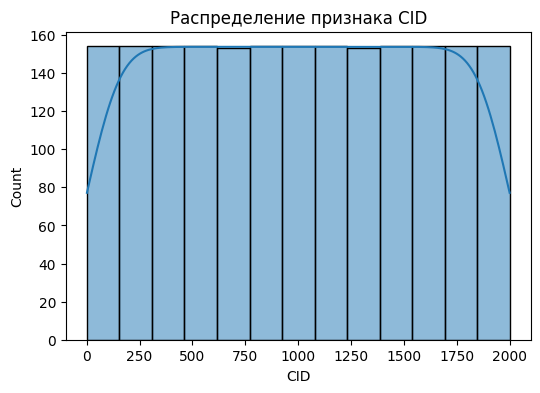

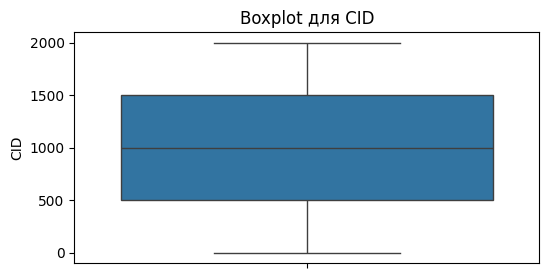

In [18]:
#EDA

## 1. Введение
#Данные были получены с целью изучения анализа данных в рамках дисциплины "Data Driven Engineering". Получение производилось с сайта PubChem при помощи API.
#Цель EDA - провести анализ. Понять структуру данных, выявить пропуски, аномалии, подготовить данные к последующей обработке. 

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
#%matplotlib inline                          #для графиков
#sns.set(color_codes=True)

## 2. Описание данных
#Файл, размер (строки, столбцы), краткое описание колонок.
"""
Данные являются химическими органическими соединениями с размером 2000 строк, 16 столбцов.
1 (CID) - номер соединения
2 (MolecularFormula) - Молекулярная формула 
3 (MolecularWeight) - Молекулярный вес
4,5 (SMILES, ConnectivitySMILES)- Запись химических соединения в международной системе SMILES
6 (InChIKey) - Идентификационный ключ химического соединения, по которому его можно будет идентифицировать
7-16 (Вычисления)
"""

## 3. Загрузка данных и первичный осмотр

df = pd.read_csv(r"C:\Users\Asus\PycharmProjects\Data_engineering\data\pubchem_raw.csv")

df.head(5)          #вывод 5 первых строк
df.tail(5)          #вывод 5 последних строк

## 4. Оценка структуры 

print("Размер датасета:", df.shape)
df.info()                           # Общая информация 
df.dtypes                           # Типы данных 
df.describe().T                     #Числовые переменные
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    print(f"\nСтолбец: {c}")
    print(df[c].value_counts().head(5))
    
## 5. Оценка целостности и полноты

    missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'count': missing,                    #для пропусков
    'percent': missing_percent
})
print("Пропуски в данных:")
display(missing_df.head(20))

dupes = df.duplicated().sum()             #для дубликатов
print(f"Количество дубликатов строк: {dupes}")

## 6. Оценка выбросов и аномалий

#выбросы
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def iqr_outlier_count(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return ((series < lower) | (series > upper)).sum()

outliers = {col: iqr_outlier_count(df[col].dropna()) for col in num_cols}
pd.Series(outliers).sort_values(ascending=False).head(15)

#метрики 
rows = []
for c in df.columns:
    d = {}
    d['column'] = c
    d['dtype'] = str(df[c].dtype)
    d['missing_%'] = round(df[c].isnull().mean() * 100, 2)
    d['unique_values'] = df[c].nunique()
    if df[c].dtype in ['float64', 'int64']:
        d['mean'] = df[c].mean()
        d['std'] = df[c].std()
        d['min'] = df[c].min()
        d['max'] = df[c].max()
    rows.append(d)

metrics = pd.DataFrame(rows)
metrics.head(10)


## 7. Визуализация
# Гистограмма первого числового признака
if len(num_cols) > 0:
    col = num_cols[0]
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Распределение признака {col}')
    plt.show()

# Boxplot для выбросов
plt.figure(figsize=(6,3))
sns.boxplot(df[num_cols[0]])
plt.title(f'Boxplot для {num_cols[0]}')
plt.show()

## 8. Итоги
#Были получены следующие результаты:
"""
Размер - (2000, 16)
Признаки - 7 целочисленных, 5 вещественных
Категориальные признаки - 4 призкака (MolecularFormula, SMILES, ConnectivitySMILES, InChIKey)
Пропуски - Столбец XLogP (47 пропусков).
    Так как датасет используется для хранения химических данных - столбец XLogP означает логарифм коэффициента распределения вещеста.
     Пропуск может интерпретироваться как невозможность посчитать логарифм и исключать данные не стоит.    
Дубликаты не найдены
Выбросы - В числовых столбцах (XLogP, MolecularWeight, TPSA, Complexity)
"""
